In [1]:
pip install tensorflow matplotlib


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



11490434/11490434 [==============================] - 3s 0us/step


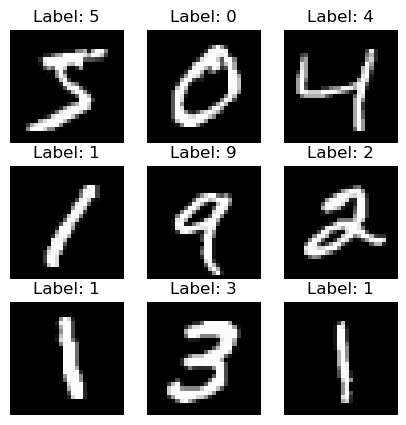

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to [0, 1] (for better training)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display some images from the dataset
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()


In [3]:
# Define a simple neural network model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 image to 1D array
    keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer (10 classes for digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Train the model on the training set
model.fit(x_train, y_train, epochs=5, batch_size=32)



Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2568 - accuracy: 0.9266
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1151 - accuracy: 0.9658
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0783 - accuracy: 0.9767
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0596 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9865


In [5]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


313/313 [==============================] - 1s 3ms/step - loss: 0.0812 - accuracy: 0.9749
Test Accuracy: 97.49%


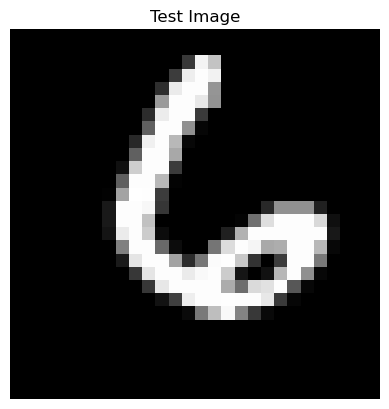

1/1 [==============================] - 0s 104ms/step
Predicted Digit: 6


In [6]:
# Select a random test image
index = np.random.randint(0, len(x_test))
image = x_test[index]

# Display the selected image
plt.imshow(image, cmap="gray")
plt.title("Test Image")
plt.axis("off")
plt.show()

# Reshape image for model input and predict
image = image.reshape(1, 28, 28)
prediction = np.argmax(model.predict(image))
print(f"Predicted Digit: {prediction}")
